In [1]:
%pip install --quiet git+https://github.com/ramayer/elephant-rumble-inference@v0.9.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import elephant_rumble_inference as eri
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE = 'cpu'
aves_hubert_model          = eri.AvesTorchaudioWrapper().to(DEVICE)
elephant_rumble_classifier = eri.ElephantRumbleClassifier().to('cpu')
audio_file_processor       = eri.AudioFileProcessor(aves_hubert_model,elephant_rumble_classifier,device=DEVICE)
elephant_rumble_classifier.load_pretrained_weights('best.pth')


/home/ron/.local/share/hatch/env/virtual/audio-classifier-visualizer/-kFJ_BLn/audio-classifier-visualizer/lib/python3.12/site-packages/elephant_rumble_inference/aves_torchaudio_wrapper.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue 

In [3]:
audio_path = '/tmp/test.wav'
scores = audio_file_processor.classify_wave_file_for_rumbles(audio_path, limit_audio_hours=1)
feature_rate = audio_file_processor.rumble_sr // audio_file_processor.audio_samples_per_embedding

Classifying hour 0 of /tmp/test.wav torch.Size([0, 1]), torch.Size([1800000, 1]), torch.Size([5120, 1])


In [4]:
# Re-import in case module was modified
import importlib
import audio_classifier_visualizer as acv
importlib.reload(acv)
raven_file_helper = acv.RavenFileHelper()
audio_file_processor = acv.AudioFileProcessor()


In [5]:
scores.shape

torch.Size([5625, 2])

In [6]:
probabilities = torch.nn.functional.softmax(2*scores/torch.max(torch.abs(scores)), dim=1)

probabilities

tensor([[0.7649, 0.2351],
        [0.6495, 0.3505],
        [0.4674, 0.5326],
        ...,
        [0.7121, 0.2879],
        [0.5486, 0.4514],
        [0.5804, 0.4196]])

end_time = 300, end_index = 468, similarity.shape = torch.Size([468]), len(fairseq_time) = 468
probs.shape = torch.Size([468, 2]), labels = ['Not an elephant', 'Elephant Rumble'], feature_rate = 1.5625
time_axis = [0.   0.64 1.28] ... [293.12 293.76 294.4  295.04 295.68 296.32 296.96 297.6  298.24 298.88]
duration = 300
duration = 300
duration = 300
duration = 300


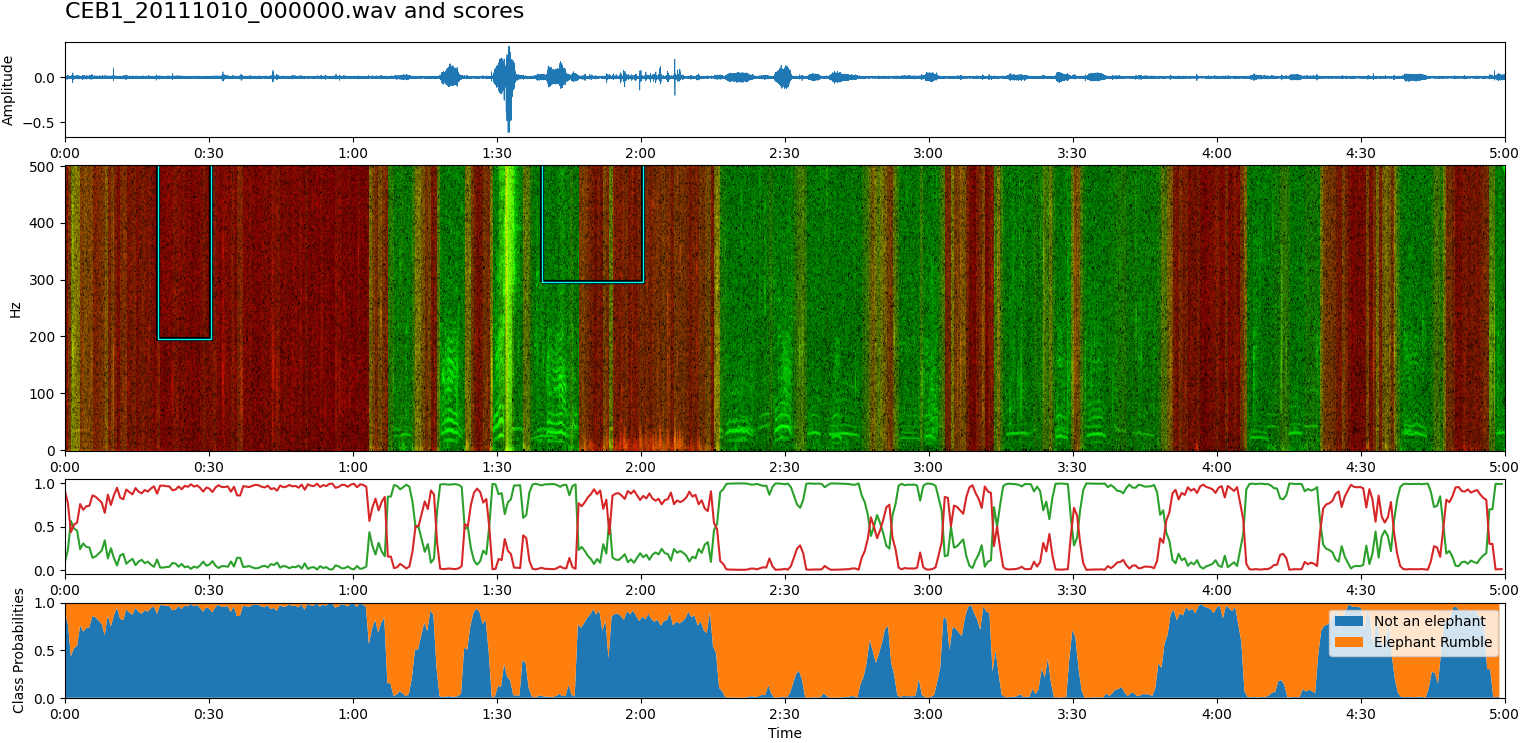

In [11]:
import torch
from audio_classifier_visualizer import RavenLabel


probabilities = torch.nn.functional.softmax(4*scores/torch.max(torch.abs(scores)), dim=1)
probabilities

audio_file = 'CEB1_20111010_000000.wav'
start_time = 0
duration = 60 * 60
AVES_SR = 4000
audio_path = '/tmp/test.wav'

sr = AVES_SR
# y = raven_file_helper.get_downsampled_tensor(audio_file,start_time,duration+start_time,new_sr=AVES_SR)
feature_rate = 500 / 320
# Create some demo labels
demo_labels = [
    RavenLabel(
        bt=20.0,  # begin time
        et=30.0,  # end time 
        lf=200,   # low frequency
        hf=600,   # high frequency
        duration=10.0,
        audio_file=audio_path,
        t1="demo1",
        t2=None,
        t3=None,
        notes="Demo annotation 1",
        score=0.95,
        ravenfile=None
    ),
    RavenLabel(
        bt=100.0,
        et=120.0,
        lf=300,
        hf=900, 
        duration=20.0,
        audio_file=audio_path,
        t1="demo2",
        t2=None,
        t3=None,
        notes="Demo annotation 2", 
        score=0.85,
        ravenfile=None
    )
]
audio_file_visualizer = acv.AudioFileVisualizer(audio_path, 
                                                start_time=0, end_time=60*5,
                                                feature_rate=feature_rate,
                                                class_probabilities=probabilities[0:468],
                                                n_fft=512,
                                                sr=1000,
                                                class_labels=["Not an elephant", "Elephant Rumble"],)


#y = raven_file_helper.load_entire_wav_file(audio_path, new_sr = AVES_SR)
#print(y.shape)
#print(sr)
#y = y.flatten().to(torch.float16)[0:10000]
audio_file_visualizer.visualize_audio_file_fragment(
    f"{audio_file} and scores",
    '/tmp/1.png',
    # audio_path,
    #scores[0:468,1],
    #scores[0:468,0],
    probabilities[0:468,1],
    probabilities[0:468,0],
    audio_file_processor,
    start_time=0,
    end_time=60*5,
    colormap='raw',
    width=16,
    height=8,
    labels=demo_labels,  # Add the demo labels

)
from PIL import Image
import IPython.display as ipd
ipd.display(Image.open('/tmp/1.png'))

